#### Import the Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from seaborn import countplot as cp
import gc
import warnings
warnings.filterwarnings('ignore')


In [2]:
application_train_1 = pd.read_csv('D:/Subhradeep/Dataset/DC/Feature_Selection/H_Credit/application_train.csv')

#### Checking the Shape of the training dataset

In [3]:
application_train_1.shape

(307511, 122)

In [4]:
application_train_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
application_train_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train_1['TARGET'].nunique()

2

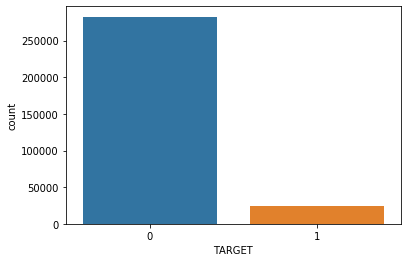

In [7]:
cp('TARGET',data=application_train_1)
plt.show()

In [8]:
application_train_1['TARGET'].isna().sum()

0

#### Stratified Sampling(frac=0.1)

    Parameters
            nint, optional:- Number of items from axis to return. Cannot be used with frac. Default = 1 if frac = None.

            fracfloat, optional:- Fraction of axis items to return. Cannot be used with n.

            replace : bool, default False:- Allow or disallow sampling of the same row more than once.


In [9]:
train_sample_0 = application_train_1.loc[application_train_1['TARGET']==0].sample(frac=0.1,replace=False)
train_sample_1 = application_train_1.loc[application_train_1['TARGET']==1].sample(frac=0.1,replace=False)

In [10]:
print('Shape of the Train Sample 0 is :',train_sample_0.shape)
print('Shape of the Train sample 1 is :',train_sample_1.shape)

Shape of the Train Sample 0 is : (28269, 122)
Shape of the Train sample 1 is : (2482, 122)


In [11]:
application = pd.concat([train_sample_1,train_sample_0]).sort_values('SK_ID_CURR')

In [12]:
application.shape

(30751, 122)

In [13]:
categorical = []
numerical = []

for i in application.columns.to_list():
    if application[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)
print('Total number of Categorical feature are :',len(categorical))
print('Numerical Feature are: ',len(numerical))


Total number of Categorical feature are : 16
Numerical Feature are:  106


#### Dummy Variables for  values in Categorical columns:
    
    Drop first to avoid dummy trap

In [14]:
application = pd.get_dummies(application,drop_first=True)
del application_train_1
gc.collect()
application.columns


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=229)

#### Handling Null values for Numerical columns:
    
    

In [15]:
from sklearn.impute import SimpleImputer

application[numerical] = SimpleImputer(strategy='median').fit_transform(application[numerical])


### Splitting the data into X(Dependent) and Y(Independent) 

In [16]:
X = application.drop(['SK_ID_CURR','TARGET'],axis=1)
y = application.TARGET
feature_name = X.columns.to_list()


#### Feature Selection:
    
    Pearson Correlation:-
    
        Normalization is not required 

In [27]:
def corr_selector(X,y):
    
    corr_list=[]
    
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i],y)[0,1]
        corr_list.append(cor)
    corr_list = [0 if np.isnan(i) else i for i in corr_list]
    
    #feature_name
    corr_feature = X.iloc[:,np.argsort(np.abs(corr_list))[-100:]].columns.tolist()
    # feature selection 0 for not select, 1 for select
    corr_support = [True if i in corr_feature else False for i in feature_name]
    
    return corr_support,corr_feature
    
    

In [18]:
corr_support,corr_feature= corr_selector(X,y)
len(corr_feature)

100

#### Select K Best:
    
     http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
     

Chi-2 : Normalizing:Using Min Max Scaler:

        MinMaxScaler is a good place to start unless you know you want your feature to have a normal distribution or want outliers to have reduced influence.
        
        
        
When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.



In [19]:
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2,k=100)
chi_selector.fit(X_norm,y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.to_list()
len(chi_feature)


100

#### RFE(Recursive Feature Engineering):
    
    http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
        
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller 
sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is 
obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


Normalization & Impute: Yes for Logistic Regression



In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [21]:
rfe_selection = RFE(estimator=LogisticRegression(),n_features_to_select=100,step=10,verbose=5)
rfe_selection.fit(X_norm,y)
rfe_support = rfe_selection.get_support()
rfe_feature = X.iloc[:,rfe_support].columns.tolist()
print('Length of the feature',len(rfe_feature))



Fitting estimator with 227 features.
Fitting estimator with 217 features.
Fitting estimator with 207 features.
Fitting estimator with 197 features.
Fitting estimator with 187 features.
Fitting estimator with 177 features.
Fitting estimator with 167 features.
Fitting estimator with 157 features.
Fitting estimator with 147 features.
Fitting estimator with 137 features.
Fitting estimator with 127 features.
Fitting estimator with 117 features.
Fitting estimator with 107 features.
Length of the feature 100


#### Select From Model:

    Meta-transformer for selecting features based on importance weights.
    
    http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
    
    
    
thresholdstring: float, optional default None
The threshold value to use for feature selection. Features whose importance is greater or equal are kept while the others are discarded. If “median” (resp. “mean”), then the threshold value is the median (resp. the mean) of the feature importances. A scaling factor (e.g., “1.25*mean”) may also be used. If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5. Otherwise, “mean” is used by default.

In [22]:
from sklearn.feature_selection import SelectFromModel

In [23]:
lr_selector = SelectFromModel(LogisticRegression(penalty='l1'),threshold='1.25*median')
lr_selector.fit(X_norm,y)
lr_support = lr_selector.get_support()
lr_feature = X.iloc[:,lr_support].columns.tolist()
print('Length of feature',len(lr_feature))


Length of feature 108


#### Random Forest:
    
    Selecting features based on Random Forest 
    Normalization: No
    Impute Missing value: Yes

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100),threshold='1.25*median')
rf_selector.fit(X,y)
rf_support = rf_selector.get_support()
rf_feature = X.iloc[:,rf_support].columns.tolist()
print('Length of feature',len(rf_feature))

Length of feature 100


#### Light GBM:
    
    Normalization & Imputing: No
    
    
    https://lightgbm.readthedocs.io/en/latest/Python-API.html
    

In [25]:
from lightgbm import LGBMClassifier

lgbclassifier = LGBMClassifier(n_estimators=100, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

lgb_selector = SelectFromModel(lgbclassifier,threshold='1.25*median')
lgb_selector.fit(X_norm,y)
lgb_support = lgb_selector.get_support()
lgb_feature = X.loc[:,lgb_support].columns.tolist()
len(lgb_feature)


227

#### Summary:

In [26]:
feature_selection_df = pd.DataFrame({'Feature':feature_name,'Pearson':corr_support,
                                    'Chi 2':chi_support,'Recursive Feature Engineering':rfe_support,
                                     'Logistic Regression':lr_support,
                                     'Light GBM':lr_support,
                                    })

feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'],ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)


,Feature,Pearson,Chi 2,Recursive Feature Engineering,Logistic Regression,Light GBM,Total
1,REG_CITY_NOT_LIVE_CITY,True,True,True,True,True,5
2,REGION_POPULATION_RELATIVE,True,True,True,True,True,5
3,ORGANIZATION_TYPE_Self-employed,True,True,True,True,True,5
4,ORGANIZATION_TYPE_Military,True,True,True,True,True,5
5,ORGANIZATION_TYPE_Industry: type 10,True,True,True,True,True,5
...,...,...,...,...,...,...,...
96,FLAG_EMP_PHONE,True,True,True,False,False,3
97,FLAG_DOCUMENT_14,False,False,True,True,True,3
98,FLAG_CONT_MOBILE,False,False,True,True,True,3
99,ELEVATORS_MODE,True,True,True,False,False,3
